In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn as sl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [2]:
import warnings6
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("California_Houses.csv")
data

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [4]:
data.head(8)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
5,269700.0,4.0368,52,919,213,413,193,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
6,299200.0,3.6591,52,2535,489,1094,514,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972
7,241400.0,3.1200,52,3104,687,1157,647,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972


In [5]:
data.isnull()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [7]:
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [8]:
data["Median_House_Value"]

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: Median_House_Value, Length: 20640, dtype: float64

In [9]:
data.shape

(20640, 14)

In [10]:
data.size

288960

<function matplotlib.pyplot.show(close=None, block=None)>

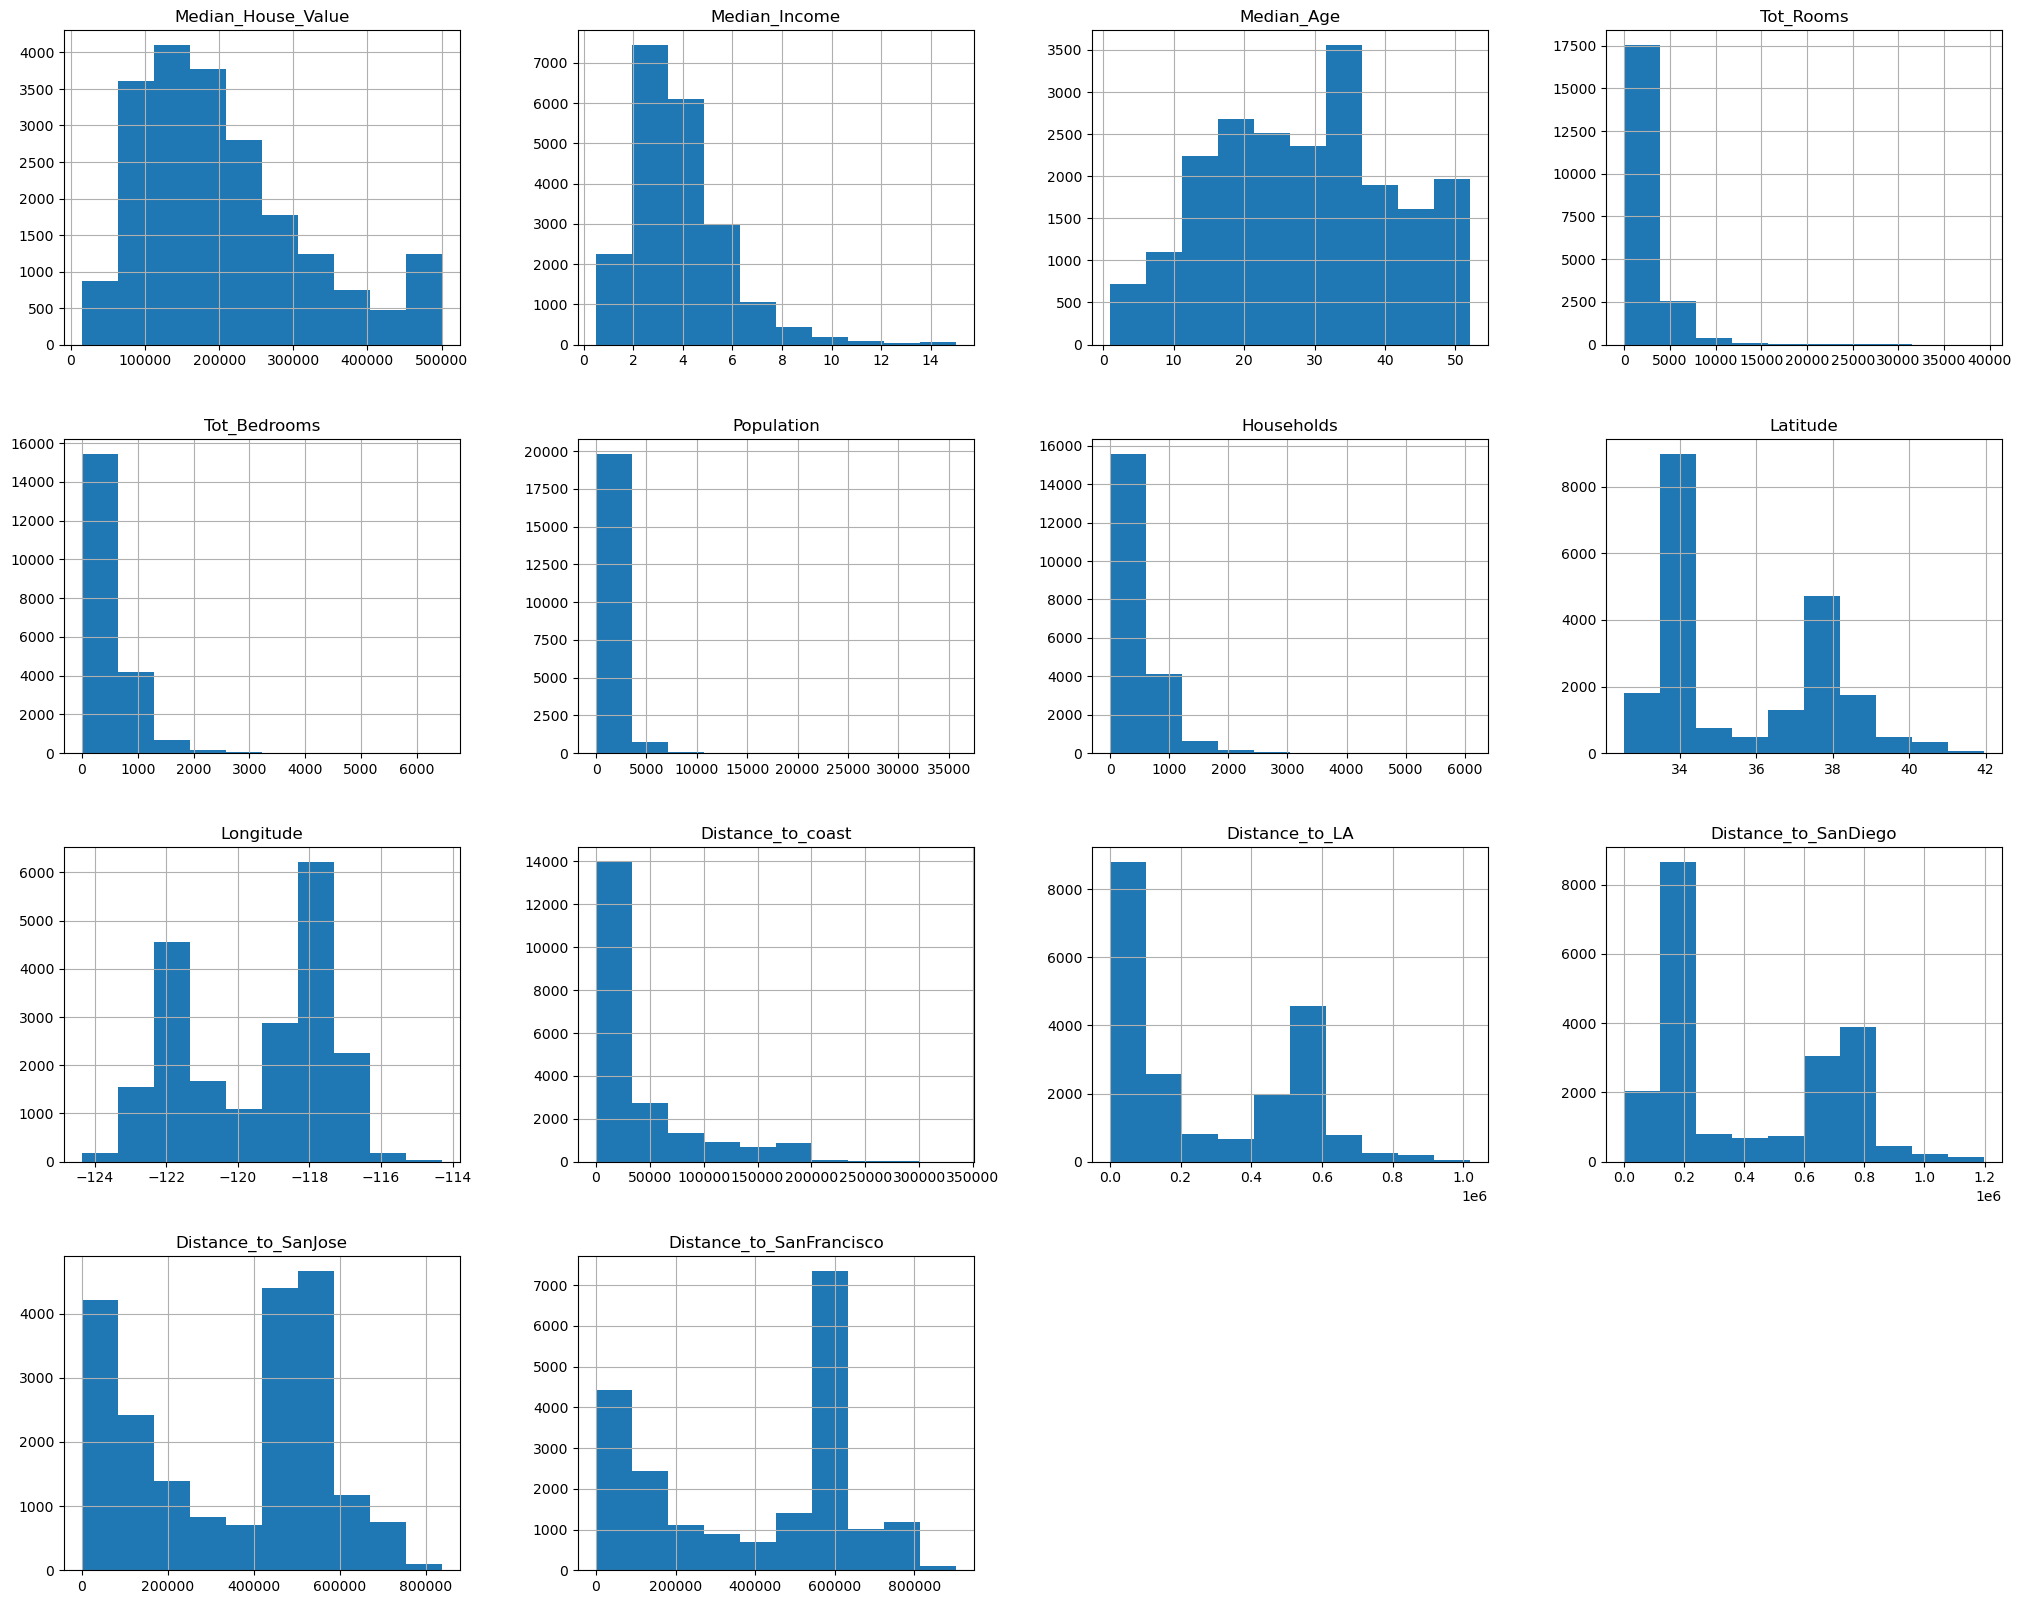

In [11]:
data.hist(figsize = (25,20))
plt.show

<Axes: xlabel='Tot_Rooms', ylabel='Count'>

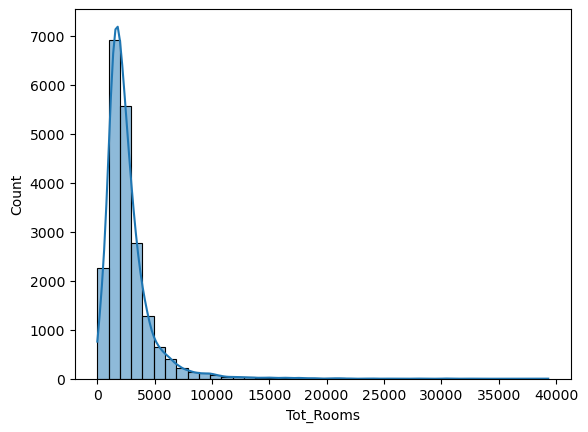

In [13]:
sb.histplot(data["Tot_Rooms"],kde = True, bins = 40)

<Axes: xlabel='Median_House_Value', ylabel='Count'>

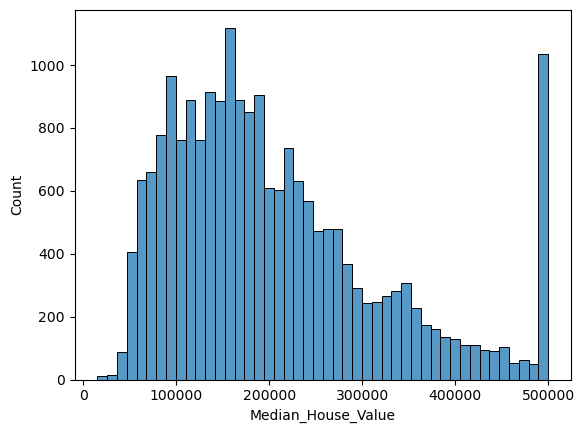

In [14]:
sb.histplot(data["Median_House_Value"])

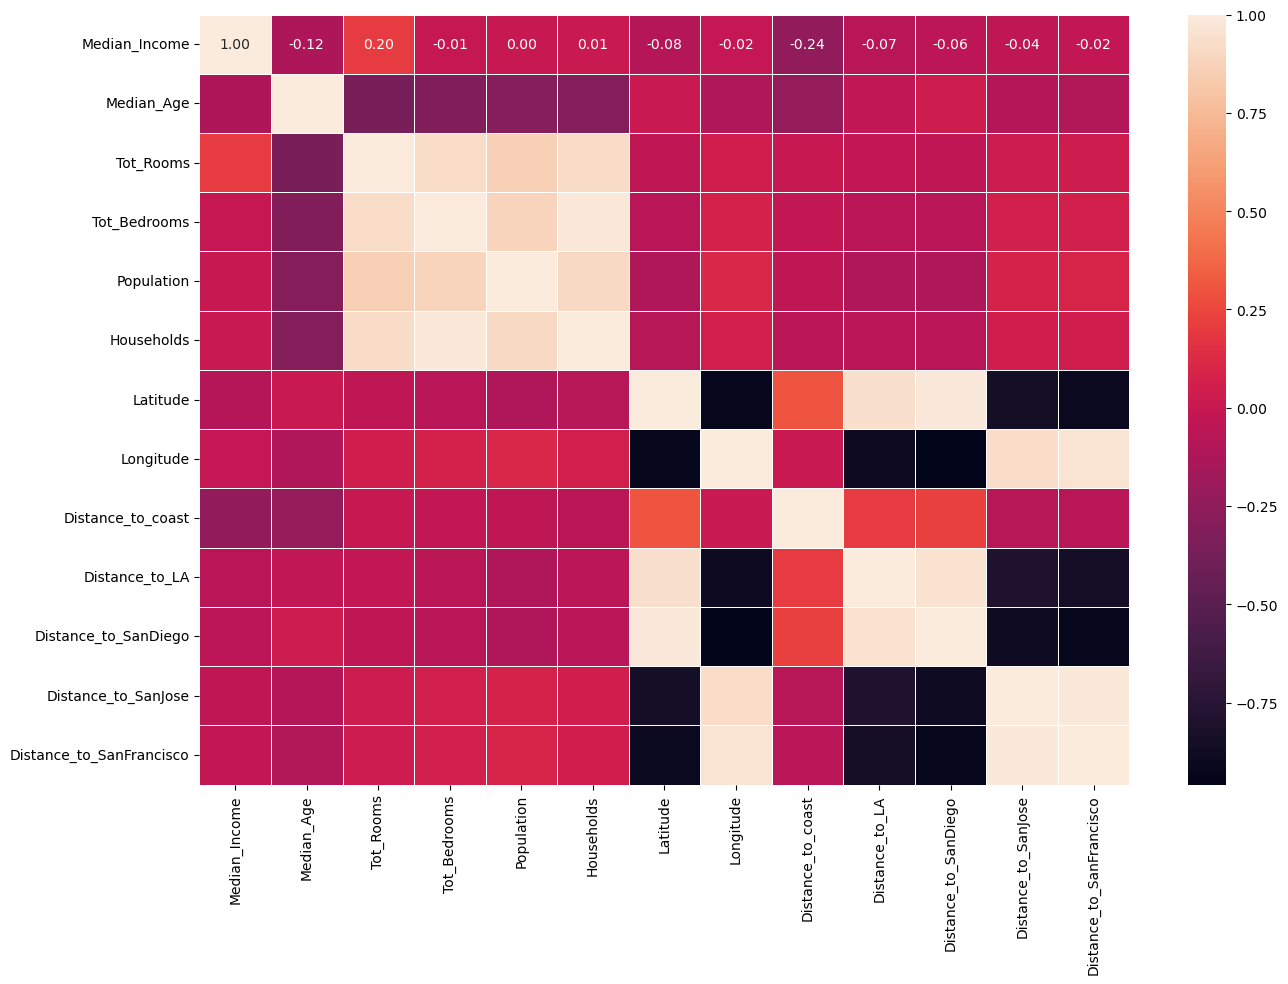

In [40]:
# correlation_matrix = data.corr(method="pearson")
# fig,ax=plt.subplots(figsize=(15,10))
# sb.heatmap(correlation_matrix,annot=True,linewidth=0.5,ax=ax)


import matplotlib.pyplot as plt
import seaborn as sb

# Assuming 'dataset' is your DataFrame
matrix = data.corr(method="pearson") 

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10)) 

# Plot the heatmap with annotations
heatmap = sb.heatmap(matrix, annot=True, fmt=".2f", linewidths=0.5, ax=ax, annot_kws={"size": 10})

# Show the plot
plt.show()

In [16]:
x = data
y= data.Median_House_Value


In [17]:
x.drop('Median_House_Value', inplace = True, axis = 1 )

In [18]:
sc = StandardScaler()

x= sc.fit_transform(x)

In [19]:
x

array([[ 2.34476576,  0.98214266, -0.8048191 , ...,  1.16566824,
        -1.29754558, -1.46107412],
       [ 2.33223796, -0.60701891,  2.0458901 , ...,  1.1578418 ,
        -1.30851803, -1.46255188],
       [ 1.7826994 ,  1.85618152, -0.53574589, ...,  1.15883974,
        -1.30935903, -1.47082449],
       ...,
       [-1.14259331, -0.92485123, -0.17499526, ...,  1.49462431,
        -0.50204022, -0.69803768],
       [-1.05458292, -0.84539315, -0.35559977, ...,  1.50835264,
        -0.51115099, -0.71472888],
       [-0.78012947, -1.00430931,  0.06840827, ...,  1.47689622,
        -0.5337677 , -0.72452362]])

In [20]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: Median_House_Value, Length: 20640, dtype: float64

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0, test_size = 0.3)

In [22]:
x_train

array([[-0.99783938,  1.85618152, -1.15686037, ...,  0.37560043,
        -0.69422052, -0.502525  ],
       [-0.84761112,  1.14105882, -0.74202007, ...,  1.12956414,
        -1.35104954, -1.46824841],
       [ 1.27821879, -0.92485123, -0.12732301, ..., -0.85014512,
         0.78365505,  0.80240632],
       ...,
       [-0.35423708,  0.18756187, -0.55224782, ...,  0.73267961,
        -1.22121253, -0.98285527],
       [ 0.92686152,  0.42593611, -0.23412719, ..., -0.94938772,
         0.91148917,  0.91327775],
       [-1.30671795, -1.08376738, -0.67142846, ..., -0.85749741,
         1.91724491,  1.78492026]])

In [23]:
x_test

array([[ 0.1479801 , -0.52756083, -0.24512848, ..., -1.31252148,
         1.56282482,  1.47859189],
       [ 1.0048181 ,  0.26701995, -0.00722559, ..., -0.84523667,
         0.78416419,  0.80287147],
       [ 0.25162391,  0.02864572,  0.24351214, ...,  1.33083917,
        -0.93461106, -1.10519823],
       ...,
       [ 2.10779041,  0.10810379, -0.46057041, ..., -0.86457587,
         0.81264248,  0.827592  ],
       [-0.95004426,  0.42593611, -0.94416877, ...,  0.29607324,
        -0.60420772, -0.41954617],
       [ 0.42396005,  0.26701995, -0.4041888 , ...,  0.9669406 ,
        -1.56666288, -1.30509314]])

In [24]:
y_train

1989      47500.0
256      100000.0
7887     285800.0
4581     175000.0
1993      59200.0
           ...   
13123    144600.0
19648    159400.0
9845     289300.0
10799    484600.0
2732      69400.0
Name: Median_House_Value, Length: 14448, dtype: float64

In [25]:
y_test

14740    136900.0
10101    241300.0
20566    200700.0
2670      72500.0
15709    460000.0
           ...   
19681     74000.0
12156    177300.0
10211    351900.0
2445      92500.0
17914    298300.0
Name: Median_House_Value, Length: 6192, dtype: float64

In [26]:
print(str(x_train.shape))
print(str(x_test.shape))
print(str(y_train.shape))
print(str(y_test.shape))

(14448, 13)
(6192, 13)
(14448,)
(6192,)


# DecisionTreeRegressor

In [27]:
des_t =  DecisionTreeRegressor(random_state = 30)
des_t.fit(x_train,y_train)

DecisionTreeRegressor(random_state=30)

In [28]:
#knn
# lr
# rfr

In [29]:
from sklearn.metrics import accuracy_score

In [51]:
predictions = des_t.predict(x_test)

mse = metrics.mean_squared_error(y_test,predictions)


mae = metrics.mean_absolute_error(y_test,predictions)

print( "Mean squared error: " ,mse)
print( "Mean absolute error: ",mae)



Mean squared error:  4552110727.949613
Mean absolute error:  41854.063953488374


In [50]:
custom_ip = [[8.3252, 41,880, 129,322,126,37.88,-122.23, 9263.040773, 556529.158342,735501.806984, 67432.517001,21250.213767]]

pr_value = des_t.predict(custom_ip)

print(pr_value)

[245800.]


# KNeighborsRegressor


In [31]:
knn =KNeighborsRegressor() 
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [52]:
knn_pridiction = knn.predict(x_test)

MSC  =  metrics.mean_squared_error(y_test,knn_pridiction)
MAE = metrics.mean_absolute_error(y_test,knn_pridiction)

print("Mean squared error: ",MSC)
print("Mean absolute error: ",MAE)

Mean squared error:  3707009353.0297737
Mean absolute error:  40312.46262919897


In [48]:
custm_ip = [[8.3252, 41,880, 129,322,126,37.88,-122.23, 9263.040773, 556529.158342,735501.806984, 67432.517001,21250.213767]]

predict_value = knn.predict(custm_ip)

print(predict_value)

[99140.]


 # LinearRegression

In [33]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [54]:
lr_prediction = lr.predict(x_test)

MAE1 = metrics.mean_absolute_error(y_test, lr_prediction)
MSE1 = metrics.mean_squared_error(y_test, lr_prediction)

print("Mean absolute error: ",MAE1)

print("Mean squared error: ",MSE1)



Mean absolute error:  50054.469046507795
Mean squared error:  4806636225.62436


In [46]:
cust_ip = [[8.3252, 41,880, 129,322,126,37.88,-122.23, 9263.040773, 556529.158342,735501.806984, 67432.517001,21250.213767]]

pred_value = lr.predict(cust_ip)

print(pred_value)

[3.42688906e+10]


# RandomForestRegressor

In [35]:
RF = RandomForestRegressor()

RF.fit(x_train, y_train)

RandomForestRegressor()

In [55]:
RF_pre = RF.predict(x_test)
mae1 = metrics.mean_absolute_error(y_test,RF_pre)

mse1 =metrics.mean_squared_error(y_test,RF_pre)

print("Mean squared error: ",mse1)
print("Mean absolute error: ",mae1)

Mean squared error:  2316448268.580537
Mean absolute error:  30864.565956072347


In [41]:
cus_ip = [[8.3252, 41,880, 129,322,126,37.88,-122.23, 9263.040773, 556529.158342,735501.806984, 67432.517001,21250.213767]]

pre_value = RF.predict(cus_ip)

print(pre_value)



[317472.11]


In [42]:
import pickle
pkl_filename = "model.pkl"

with open(pkl_filename, 'wb') as file:
    pickle.dump(RF, file)


In [44]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
score = pickle_model.score(x_test, y_test)
print(score*100)

82.62538001748713
